<a href="https://colab.research.google.com/github/guilherme4raujo/trilha_dados_ufma/blob/main/Trilha_DadosUFMA/M%C3%B3dulo%201%5Catividadeextra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisando os dados dos técnicos Administrativos da UFMA

####Qual é a quantidade técnicos administrativos por unidade, sexo e titulação no ano de 2020?

In [ ]:
import pandas as pd

url_2020 = "http://dadosabertos.ufma.br/dataset/bde43517-db0b-4aa9-9ac0-0afce96607f8/resource/2218bda5-7ca7-4296-a419-561592cd5454/download/tecnicos-administrativos_-_2020.csv"

colunas = ['nome','unidade','sexo','titulacao']
df = pd.read_csv(url_2020, sep = ';', usecols= colunas)
df.head() #-> mostrar as primeiras 5 colunas
#df.info() -> saber se os dados foram carregados corretamente



,nome,unidade,sexo,titulacao
0,ANDREA MARTINS MELO FONTENELE,HOSPITAL UNIVERSITARIO/SUPERINTENDENCIA,F,DOUTORADO
1,CANDIDO JOSE FERNANDES AGUIAR,PRO-REITORIA DE GESTAO DE PESSOAS - PROGEP,M,ESPECIALIZAÇÃO
2,DENISE ATAIDE DE OLIVEIRA JESUS,GABINETE/REITORIA,F,ESPECIALIZAÇÃO
3,JOSE JORGE MENDES,GABINETE/REITORIA,M,MESTRADO
4,NEUSA BUZAR VASCONCELOS,GABINETE/REITORIA,F,MESTRADO


##Primeira Análise:
#### Analisar a quantidade de técnicos por UNIDADE de trabalho:

In [ ]:
df.unidade.value_counts().sort_values(ascending= False).head(10)
#value_counts -> conta quantas vezes um determinado valor aparece na coluna desejada, neste caso "unidade"
#sort_values -> Mostra por ordem, por padrão este método ele apresenta os valores por ordem CRESCENTE,
#por isso utiliza-se o parâmetro "ascending = False" para que os valores apareçam de forma DECRESCENTE.

,count
unidade,
HOSPITAL UNIVERSITARIO/SUPERINTENDENCIA,503
CENTRO DE CIENCIAS SOCIAIS SAUDE E TECNOLOGIA - CCSST,37
SUPERINTENDENCIA DE INFRAESTRUTURA/SINFRA,36
DIVISAO DE ATENDIMENTO AO USUARIO/DIB,29
"CENTRO DE CIENCIAS HUMANAS, NATURAIS, SAUDE E TECNOLOGIA - CCHNST",25
CENTRO DE CIENCIAS AGRARIAS E AMBIENTAIS - CCAA,24
DIRETORIA DE ACESSIBILIDADE/PROEN,22
COLEGIO UNIVERSITARIO,22
COORDENACAO DE SEGURANCA/SINFRA,20


##Segunda Análise:
#### Analisar a quantidade de técnicos por titulação:


In [ ]:
df.titulacao.value_counts().sort_values(ascending = False)

,count
titulacao,
ESPECIALIZAÇÃO,787
ENSINO MÉDIO,324
MESTRADO,310
GRADUAÇÃO,230
DOUTORADO,45
ENSINO FUNDAMENTAL,18
TÉCNICO PROFISSIONALIZANTE - ENS. MÉDIO,3
ENSINO FUNDAMENTAL INCOMPLETO,3
GRADUAÇÃO INCOMPLETO,1


#####Plotagem dos dados acima(TITULAÇÃO):

<Axes: xlabel='titulacao'>

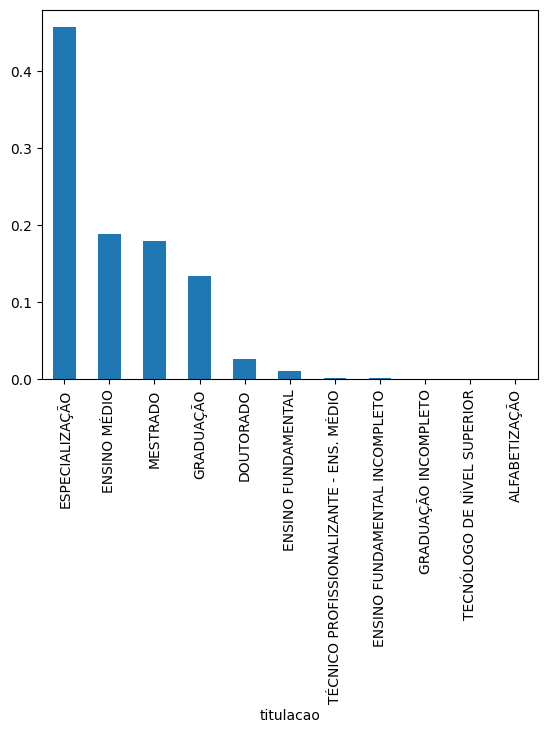

In [ ]:
df['titulacao'].value_counts(normalize=True).plot(kind='bar')
# parâmetro "normalize = True" para apresentar os valores por proporção.
#Exemplo disso é a especialização com quase 50% dos técnicos(0.5 apresentado no gráfico).

##Terceira Análise
####Analisando a titulação e o sexo dos técnicos.

######Primeiramente analisando o número de técnicos por gênero:

In [ ]:
df.sexo.value_counts().sort_values(ascending=False)

,count
sexo,
F,972
M,751


<Axes: xlabel='sexo'>

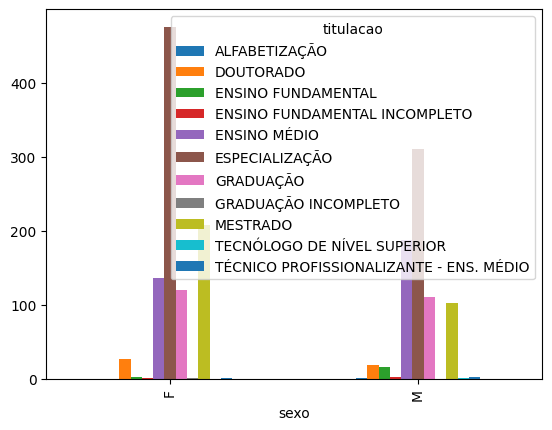

In [ ]:
df.value_counts(['sexo', 'titulacao']).unstack().plot(kind='bar',)
#O gráfico ficou um pouco confuso e poluído, então decidir pesquisar por
#uma forma de deixá-lo mais clean.

<Axes: xlabel='titulacao'>

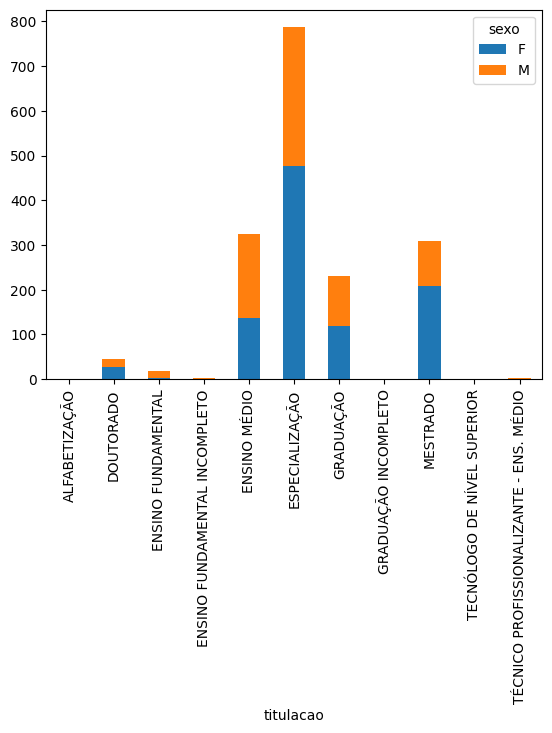

In [ ]:
#Descobri que o primeiro parâmetro passado no value_counts(EIXO X, EIXO Y) é referente ao eixo X e o segundo ao eixo Y.
#Desta forma, se passarmos "TITULACAO" como eixo X e "SEXO" como eixo Y, o gráfico fica assim:
#Bem mais compreensível. :3 <3
df.value_counts(['titulacao', 'sexo']).unstack().plot(kind='bar', stacked=True)

##Última Análise
####Vamos analisar as 10 primeiras unidades com mais técnicos por sexo masculino e por sexo feminino

In [ ]:
tecnicos_masculino = df.query("sexo == 'M'").unidade.value_counts()
tecnicos_feminino = df.query("sexo == 'F'").unidade.value_counts()

tecnicos_masculino.sort_values(ascending=False).head(10)

,count
unidade,
HOSPITAL UNIVERSITARIO/SUPERINTENDENCIA,98
SUPERINTENDENCIA DE INFRAESTRUTURA/SINFRA,36
COORDENACAO DE SEGURANCA/SINFRA,20
CENTRO DE CIENCIAS AGRARIAS E AMBIENTAIS - CCAA,16
CENTRO DE CIENCIAS SOCIAIS SAUDE E TECNOLOGIA - CCSST,15
SERVICO DE SEGURANCA E MEDICINA DO TRABALHO/PROGEP,12
"CENTRO DE CIENCIAS HUMANAS, NATURAIS, SAUDE E TECNOLOGIA - CCHNST",11
CAMPUS BALSAS - CPBL,11
COORDENACAO DO CURSO DE MEDICINA PINHEIRO/CCHNST,10


In [ ]:
tecnicos_feminino.sort_values(ascending=False).head(10)

,count
unidade,
HOSPITAL UNIVERSITARIO/SUPERINTENDENCIA,405
DIVISAO DE ATENDIMENTO AO USUARIO/DIB,22
CENTRO DE CIENCIAS SOCIAIS SAUDE E TECNOLOGIA - CCSST,22
"CENTRO DE CIENCIAS HUMANAS, NATURAIS, SAUDE E TECNOLOGIA - CCHNST",14
COLEGIO UNIVERSITARIO,14
DIRETORIA DE ACESSIBILIDADE/PROEN,13
DIVISAO MEDICA,12
GABINETE/REITORIA,11
DIVISAO DE NUTRICAO E DIETETICA,11
